In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import user_testing_data

sns.set()

In [2]:
df = user_testing_data.load_data()
df.head(n=5)

,Code,Test,Tab,Center,L/B,Task,ST,CT,ToT,Init,CFA,aCFA,FS,FCA,CEDZ,Notes,source,target,position
0,TacoBullMonsterSurf,6,N,Y,B,1-2,2:22,2:29,7.0,G to RTDZ,G to RTDZ,G to TEDZ,0.0,NaN,NaN,Would have landed in TaDZ.,G,R,T
1,PopeyeVeganMonkeyMoogle,2,Y,Y,B,4-1,3:51,4:02,11.0,G to BBDZ,G to BEDZ,NaN,1.0,G to BEDZ,Y,Went to middle to find EDZ,G,B,B
2,FalseDonkey,1,Y,Y,L,4-1,4:12,4:44,32.0,G to REDZ,G to BEDZ,NaN,2.0,Messy Reorganize,Y,"Went to middle for EDZ. Tried to find EDZ, but...",G,E,R
3,SimpleNeptuneMachineDamage,5,N,Y,L,4-1,3:35,3:41,6.0,G to BEDZ,G to BEDZ,NaN,0.0,NaN,Y,Went to center for EDZ,G,E,B
4,HelloGoodbyeHelloHugo,4,Y,N,B,1-2,2:08,2:20,12.0,G to RTaDZ,G to RBDZ,NaN,1.0,G to RTDZ,NaN,"Was confused about how drop zones worked, felt...",G,R,Ta


# Should we add Tab dropzones?

Currently, JupyterLab does not support Tab dropzones. The following tests compare UX when Tab dropzones are available versus not available. 

## Accuracy with Tabs (did they fail?)

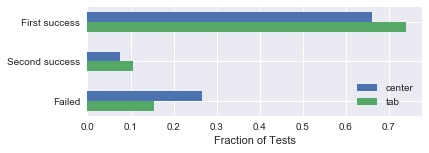

In [3]:
# Subset dataframes
with_tab = df[(df.Tab == 'Y') & (df.Center == 'N') & (df.FS.isin([0,1,2]))]
with_tab_total = len(with_tab)
with_center = df[(df.Tab == 'N') & (df.Center == 'Y') & (df.FS.isin([0,1,2]))]
with_center_total = len(with_center)

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

y = np.array([0, 2, 4])
x = [
    len(with_tab[with_tab.FS == 2]) / with_tab_total, 
    len(with_tab[with_tab.FS == 1]) / with_tab_total, 
    len(with_tab[with_tab.FS == 0]) / with_tab_total, 
]

x2 = [
    len(with_center[with_center.FS == 2]) / with_center_total, 
    len(with_center[with_center.FS == 1]) / with_center_total, 
    len(with_center[with_center.FS == 0]) / with_center_total, 
]

ax.barh(y+.5, x2, height=0.5, align='edge', label="center")
ax.barh(y, x, height=0.5, align='edge', label="tab")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Second success", "First success"])
ax.set_xlabel("Fraction of Tests")

ax.legend()

## Accuracy in Task 3, specifically.

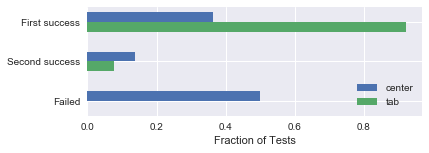

In [4]:
# Subset dataframes
filters = (
    (df.Tab == 'Y') &            # Tab is Y
    (df.Center == 'N') &         # Center is N
    (df.FS.isin([0,1,2])) &      # First success score.
    (df.Task.isin(['3-1', '3-2'])) # Must be Task 3
)
with_tab = df[filters]
with_tab_total = len(with_tab)


filters = (
    (df.Tab == 'N') &            # Tab is Y
    (df.Center == 'Y') &         # Center is N
    (df.FS.isin([0,1,2])) &       # First success score.
    (df.Task.isin(['3-1', '3-2'])) # Must be Task 3
)
with_center = df[filters]
with_center_total = len(with_center)

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

y = np.array([0, 2, 4])
x = [
    len(with_tab[with_tab.FS == 2]) / with_tab_total, 
    len(with_tab[with_tab.FS == 1]) / with_tab_total, 
    len(with_tab[with_tab.FS == 0]) / with_tab_total, 
]

x2 = [
    len(with_center[with_center.FS == 2]) / with_center_total, 
    len(with_center[with_center.FS == 1]) / with_center_total, 
    len(with_center[with_center.FS == 0]) / with_center_total, 
]

ax.barh(y+.5, x2, height=0.5, align='edge', label="center")
ax.barh(y, x, height=0.5, align='edge', label="tab")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Second success", "First success"])
ax.set_xlabel("Fraction of Tests")

ax.legend()

## Did tabs help improve speed?

Text(0.5,1,'Kernel density estimation')

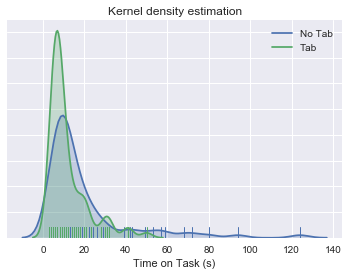

In [5]:
filters = (
    (df.Tab == "N") &       # Tab no
    (df.Center == "Y") &    # Center yes
    (df.ToT < 300)          # Remove outliers
)
notab_df = df[filters]

filters = (
    (df.Tab == "Y") &       # Tab yes
    (df.Center == "Y") &    # Center yes
    (df.ToT < 300)          # Remove outliers
)
tab_df = df[filters]


fig, ax = plt.subplots()

sns.distplot(notab_df.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="No Tab")
sns.distplot(tab_df.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="Tab")

ax.set_xlabel("Time on Task (s)")
ax.set_yticklabels([])
ax.set_title("Kernel density estimation")
#x = ax.hist(notab_df.ToT.astype(float), bins=20)

## What did users use (center drop-zones or tabs)?

Text(0.5,1,'What drop-zones did users use?')

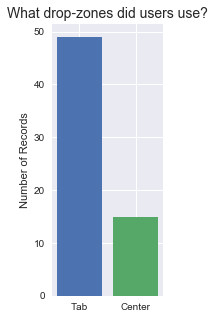

In [6]:
task_3 = df[(df.Task == "3-1") | (df.Task == "3-2")]

tab = len(task_3[task_3.position == "Ta"])
center = len(task_3[task_3.position.isin(["L", "R", "T", "C"])])

x = ["Tab", "Center"]
y = [tab, center]

fig, ax = plt.subplots(figsize=(2,5))
ax.bar(x, y, color=["C0", "C1"])
ax.set_ylabel("Number of Records")
ax.set_title("What drop-zones did users use?", fontsize=14)

# Box versus Line

Currently, JupyterLab's UI uses boxes to inform the user where a panel will be dropped when the user is dragging it across the interface. 

An alternative UX we proposed were lines that inform where the panel will be dropped. The following results compare these two UXs.

## Are users more accurate with box or line?

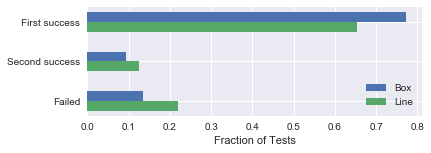

In [7]:
# Line dropzone dataframe
filters = (
    (df["L/B"] == 'L') &         # Tab is Y
    (df.FS.isin([0,1,2]))      # First success score.
)
line_dz = df[filters]
norm = len(line_dz)

x1 = [
    len(line_dz[line_dz.FS == 2]) / norm, 
    len(line_dz[line_dz.FS == 1]) / norm, 
    len(line_dz[line_dz.FS == 0]) / norm, 
]

# Box dropzone dataframe
filters = (
    (df["L/B"] == 'B') &         # Tab is Y
    (df.FS.isin([0,1,2]))      # First success score.
)
box_dz = df[filters]
norm = len(box_dz)

x2 = [
    len(box_dz[box_dz.FS == 2]) / norm, 
    len(box_dz[box_dz.FS == 1]) / norm, 
    len(box_dz[box_dz.FS == 0]) / norm, 
]
y = np.array([0, 2, 4])

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

ax.barh(y+.5, x2, height=0.5, align='edge', label="Box")
ax.barh(y, x1, height=0.5, align='edge', label="Line")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Second success", "First success"])
ax.set_xlabel("Fraction of Tests")
ax.set_title("")
ax.legend()

## How long did it take users to complete tasks?

Text(0.5,1,'Kernel density estimation')

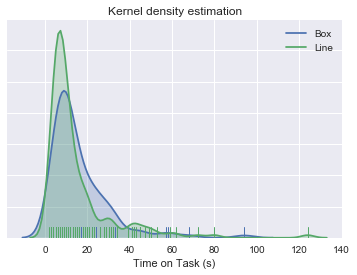

In [8]:
filters = (
    (df["L/B"] == 'B') &         # Tab is Y
    (df.ToT < 300)          # Remove outliers
)
line_dz = df[filters]

filters = (
    (df["L/B"] == 'L') &         # Tab is Y
    (df.ToT < 300)          # Remove outliers
)
box_dz = df[filters]


fig, ax = plt.subplots()

sns.distplot(line_dz.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="Box")
sns.distplot(box_dz.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="Line")

ax.set_xlabel("Time on Task (s)")
ax.set_yticklabels([])
ax.set_title("Kernel density estimation")
#x = ax.hist(notab_df.ToT.astype(float), bins=20)

# Edge drop zones.

## Which are used more: edge drop zones or panel drop zones?

Text(0.5,1,'What drop-zones did users use?')

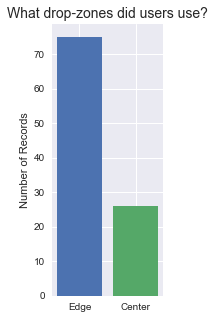

In [23]:
# Edge dropzone dataframe
dff = df[df.Task.isin(['4-1', '4-2', '5-1'])]
norm = len(dff)

edge = len(dff[dff.target == 'E'])
center = len(dff[dff.target.isin(['R', 'G', 'B'])])

x = ["Edge", "Center"]
y = [edge, center]

fig, ax = plt.subplots(figsize=(2,5))
ax.bar(x, y, color=["C0", "C1"])
ax.set_ylabel("Number of Records")
ax.set_title("What drop-zones did users use?", fontsize=14)

## How accurate are users with edge drop zones?

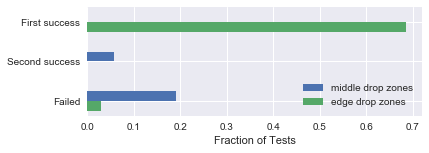

In [19]:
# Edge dropzone dataframe
dff = df[df.Task.isin(['4-1', '4-2', '5-1'])]
norm = len(dff)
filters = (
    (dff.target == 'E') &
    (dff.FS.isin([0,1,2]))                    # First success score.
)
edge_dz = dff[filters]

x1 = [
    len(edge_dz[edge_dz.FS == 2]) / norm, 
    len(edge_dz[edge_dz.FS == 1]) / norm, 
    len(edge_dz[edge_dz.FS == 0]) / norm, 
]

# center dropzone dataframe
filters = (
    (dff.target.isin(['R', 'G', 'B'])) &
    (dff.FS.isin([0,1,2]))                    # First success score.
)
center_dz = dff[filters]

x2 = [
    len(center_dz[center_dz.FS == 2]) / norm, 
    len(center_dz[center_dz.FS == 1]) / norm, 
    len(center_dz[center_dz.FS == 0]) / norm, 
]
y = np.array([0, 2, 4])

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

ax.barh(y+.5, x2, height=0.5, align='edge', label="middle drop zones")
ax.barh(y, x1, height=0.5, align='edge', label="edge drop zones")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Second success", "First success"])
ax.set_xlabel("Fraction of Tests")
ax.set_title("")
ax.legend()